<a href="https://colab.research.google.com/github/Radhibomma/GCollab/blob/main/Energybasedmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
pip install tensorflow numpy matplotlib

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
import tensorflow.keras.backend as K

In [65]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [66]:
# Load and preprocess MNIST data
def load_mnist():
    (x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    return x_train, x_test

In [67]:
# Custom Swish activation
def swish(x):
    return x * tf.sigmoid(x)

In [68]:
# Energy Network
class EnergyNetwork(Model):
    def __init__(self):
        super(EnergyNetwork, self).__init__()

In [70]:
# Energy Network
class EnergyNetwork(Model):
    def __init__(self):
        super(EnergyNetwork, self).__init__()
        self.conv1 = layers.Conv2D(64, 3, activation=swish, padding='same')
        self.conv2 = layers.Conv2D(64, 3, activation=swish, padding='same')
        self.conv3 = layers.Conv2D(64, 3, activation=swish, padding='same')
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(256, activation=swish)
        self.dense2 = layers.Dense(1, activation=None)

In [71]:
def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

In [72]:
# Langevin dynamics sampling
def langevin_dynamics(model, initial_samples, n_steps=60, step_size=10.0, noise_scale=0.005):
    samples = tf.convert_to_tensor(initial_samples, dtype=tf.float32)

In [75]:
# Langevin dynamics sampling
def langevin_dynamics(model, initial_samples, n_steps=60, step_size=10.0, noise_scale=0.005):
    samples = tf.convert_to_tensor(initial_samples, dtype=tf.float32)

    # Loop over n_steps within the function definition
    for _ in range(n_steps):
        with tf.GradientTape() as tape:
            tape.watch(samples)
            energy = model(samples)

    # ... rest of your Langevin dynamics implementation ...
    return samples # or any other desired output from the function

In [76]:
# Langevin dynamics sampling
def langevin_dynamics(model, initial_samples, n_steps=60, step_size=10.0, noise_scale=0.005):
    samples = tf.convert_to_tensor(initial_samples, dtype=tf.float32)

    # Loop over n_steps within the function definition
    for _ in range(n_steps):
        with tf.GradientTape() as tape:
            tape.watch(samples)
            energy = model(samples)
            # Compute gradients - This line should be indented to be within the 'with' block
            gradients = tape.gradient(energy, samples)

    # ... rest of your Langevin dynamics implementation ...
    return samples # or any other desired output from the function

In [78]:
# Langevin dynamics sampling
def langevin_dynamics(model, initial_samples, n_steps=60, step_size=10.0, noise_scale=0.005):
    samples = tf.convert_to_tensor(initial_samples, dtype=tf.float32)

    # Loop over n_steps within the function definition
    for _ in range(n_steps):
        with tf.GradientTape() as tape:
            tape.watch(samples)
            energy = model(samples)
            # Compute gradients - This line should be indented to be within the 'with' block
            gradients = tape.gradient(energy, samples)

        # Update samples - Indented correctly within the 'for' loop
        noise = tf.random.normal(samples.shape) * noise_scale
        samples = samples - step_size * gradients + noise
        samples = tf.clip_by_value(samples, 0.0, 1.0)

    # ... rest of your Langevin dynamics implementation ...
    return samples # or any other desired output from the function

In [82]:
return samples

SyntaxError: 'return' outside function (<ipython-input-82-bf79256dfb2b>, line 1)

In [83]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]


In [85]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    # The if statement should have the same indentation level as the previous line
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())

In [87]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    # This line should be at the same indentation level as the 'if' statement
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])

In [89]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])
    # Generate samples using Langevin dynamics # This line and the next should be indented to the same level as the first line inside the function
    with tf.GradientTape() as tape:
        fake_samples = langevin_dynamics(model, init_samples)

In [92]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])
    # Generate samples using Langevin dynamics
    with tf.GradientTape() as tape:
        fake_samples = langevin_dynamics(model, init_samples)
        # Compute energies #These lines should be indented to be within the 'with' block
        real_energy = model(real_samples)
        fake_energy = model(fake_samples)

In [94]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])
    # Generate samples using Langevin dynamics
    with tf.GradientTape() as tape:
        fake_samples = langevin_dynamics(model, init_samples)
        # Compute energies
        real_energy = model(real_samples)
        fake_energy = model(fake_samples)
        # Compute loss (contrastive divergence) # This line was in 'ipython-input-93-2ca1c5977018' and has been moved inside the 'with' block
        loss = tf.reduce_mean(real_energy) - tf.reduce_mean(fake_energy)

In [96]:
# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])
    # Generate samples using Langevin dynamics
    with tf.GradientTape() as tape:
        fake_samples = langevin_dynamics(model, init_samples)
        # Compute energies
        real_energy = model(real_samples)
        fake_energy = model(fake_samples)
        # Compute loss (contrastive divergence)
        loss = tf.reduce_mean(real_energy) - tf.reduce_mean(fake_energy)

    # Update model  #This line and the next two were in 'ipython-input-95-51cfc28f0eab' and have been moved inside the 'train_step' function
    gradients = tape.gradient(loss, model.trainable_variables) # This line was indented, causing the error. It's now unindented and inside the 'train_step' function
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [99]:
import tensorflow as tf
import numpy as np

# Custom training step
@tf.function
def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    batch_size = real_samples.shape[0]
    # Initialize random samples for Langevin dynamics
    if len(sample_buffer) < batch_size:
        init_samples = tf.random.uniform((batch_size, 28, 28, 1))
        sample_buffer.extend(init_samples.numpy())
    # Sample from buffer
    buffer_idx = np.random.choice(len(sample_buffer), batch_size, replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx])
    # Generate samples using Langevin dynamics
    with tf.GradientTape() as tape:
        fake_samples = langevin_dynamics(model, init_samples)
        # Compute energies
        real_energy = model(real_samples)
        fake_energy = model(fake_samples)
        # Compute loss (contrastive divergence)
        loss = tf.reduce_mean(real_energy) - tf.reduce_mean(fake_energy)
    # Update model
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Update buffer # Moved inside the 'train_step' function
    for idx, sample in zip(buffer_idx, fake_samples.numpy()):
        sample_buffer[idx] = sample

In [138]:
return loss,fake_samples

SyntaxError: 'return' outside function (<ipython-input-138-f583d582672f>, line 1)

In [104]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()

In [106]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer # Removed the extra indentation from these two lines
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [108]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1))) #Corrected indentation - 4 spaces inside the function

    # ... (Rest of your training loop code)

In [110]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1))) #Corrected indentation - 4 spaces inside the function

    # Training history # Moved history initialization inside the function
    history = []

    # ... (Rest of your training loop code)

In [112]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here - Indentation corrected to align with function definition
    for epoch in range(epochs):
        epoch_losses = []

        # ... (Rest of your training loop code)

In [115]:
# Training loop
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here
    for epoch in range(epochs):
        epoch_losses = []

        # Iterate over the training data in batches
        for batch_start in range(0, len(x_train), batch_size): # Moved the for loop inside the train_ebm function
            batch_end = min(batch_start + batch_size, len(x_train))
            batch_real = x_train[batch_start:batch_end]

            # ... (Rest of your training loop code within the for loop)

In [117]:
# ipython-input-115-a68b3d7caef4
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here
    for epoch in range(epochs):
        epoch_losses = []

        # Iterate over the training data in batches
        for batch_start in range(0, len(x_train), batch_size):
            batch_end = min(batch_start + batch_size, len(x_train))
            batch_real = x_train[batch_start:batch_end]

            # Call train_step and append the loss
            loss, fake_samples = train_step(model, optimizer, batch_real, sample_buffer)
            epoch_losses.append(float(loss))
            #This line was incorrectly indented in the original code.
            #It should be at the same level as the line above it, inside the inner for loop.

        # ... (Rest of your training loop code within the for loop)

In [119]:
# ipython-input-117-ac0b08da8399
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here
    for epoch in range(epochs):
        epoch_losses = []

        # Iterate over the training data in batches
        for batch_start in range(0, len(x_train), batch_size):
            batch_end = min(batch_start + batch_size, len(x_train))
            batch_real = x_train[batch_start:batch_end]

            # Call train_step and append the loss
            loss, fake_samples = train_step(model, optimizer, batch_real, sample_buffer)
            epoch_losses.append(float(loss))
            #This line was incorrectly indented in the original code.
            #It should be at the same level as the line above it, inside the inner for loop.

        # Calculate average loss and add to history - This block was previously in a separate cell
        avg_loss = np.mean(epoch_losses)
        history.append(avg_loss)

        # ... (Rest of your training loop code within the for loop)

In [122]:
# ipython-input-119-a4e19ddf25c7
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here
    for epoch in range(epochs):
        epoch_losses = []

        # Iterate over the training data in batches
        for batch_start in range(0, len(x_train), batch_size):
            batch_end = min(batch_start + batch_size, len(x_train))
            batch_real = x_train[batch_start:batch_end]

            # Call train_step and append the loss
            loss, fake_samples = train_step(model, optimizer, batch_real, sample_buffer)
            epoch_losses.append(float(loss))
            #This line was incorrectly indented in the original code.
            #It should be at the same level as the line above it, inside the inner for loop.

        # Calculate average loss and add to history - This block was previously in a separate cell
        avg_loss = np.mean(epoch_losses)
        history.append(avg_loss)

        # Print the loss every 10 epochs - Moved from separate cell
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")
            #This line was causing the error because epoch was not defined in the scope of the cell it was in.
            #Moving it inside the train_ebm function makes epoch accessible.

        # ... (Rest of your training loop code within the for loop)

In [125]:
# ipython-input-99-eeea69f8c6cf
import tensorflow as tf
import numpy as np

def train_step(model, optimizer, real_samples, sample_buffer, buffer_size=10000):
    """
    Performs a single training step for the energy-based model.

    Args:
        model: The energy model.
        optimizer: The optimizer used for training.
        real_samples: A batch of real samples.
        sample_buffer: A buffer to store generated samples.
        buffer_size: The size of the sample buffer.

    Returns:
        The loss value for the step and the generated samples.
    """

    with tf.GradientTape() as tape:
        # This is where the indented block should start
        # Calculate energy for real and fake samples (replace with your logic)
        real_energy = model(real_samples)
        # Example placeholder for real energy calculation

        # Add your code for calculating fake energy here
        # ... (rest of train_step code)
        loss = ... # Calculate loss (replace with your loss function)
        # Example placeholder for loss calculation

        # Calculate gradients and apply them
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Update sample buffer
    buffer_idx = np.random.choice(buffer_size, size=len(real_samples), replace=False)
    init_samples = tf.convert_to_tensor([sample_buffer[i] for i in buffer_idx], dtype=tf.float32) #Added dtype=tf.float32 to fix mismatch
    fake_samples = langevin_dynamics(model, init_samples)
    for i, idx in enumerate(buffer_idx):
        sample_buffer[idx] = fake_samples[i].numpy()

    return loss, fake_samples

In [126]:
def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history
    history = []

    # Training loop starts here
    for epoch in range(epochs):
        epoch_losses = []

        # Iterate over the training data in batches
        for batch_start in range(0, len(x_train), batch_size):
            batch_end = min(batch_start + batch_size, len(x_train))
            batch_real = x_train[batch_start:batch_end]

            # Call train_step and append the loss
            loss, fake_samples = train_step(model, optimizer, batch_real, sample_buffer)
            epoch_losses.append(float(loss))
            #This line was incorrectly indented in the original code.
            #It should be at the same level as the line above it, inside the inner for loop.

        # Calculate average loss and add to history
        avg_loss = np.mean(epoch_losses)
        history.append(avg_loss)

        # Print the loss and generate samples every 10 epochs - Moved inside the function
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")
            # Generate and display samples
            random_samples = tf.random.uniform((16, 28, 28, 1))
            generated = langevin_dynamics(model, random_samples)

            plt.figure(figsize=(10, 10))
            for i in range(16):
                plt.subplot(4, 4, i + 1)
                plt.imshow(generated[i, :, :, 0], cmap='gray')
                plt.axis('off')
            plt.savefig(f'samples_epoch_{epoch+1}.png')
            plt.close()

        # ... (Rest of your training loop code within the for loop)

In [128]:
import tensorflow as tf
import numpy as np

class EnergyNetwork(tf.keras.Model):
    def __init__(self):
        super(EnergyNetwork, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1)  # Outputting a single energy value

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        energy = self.dense2(x)  # Output is the energy
        return energy

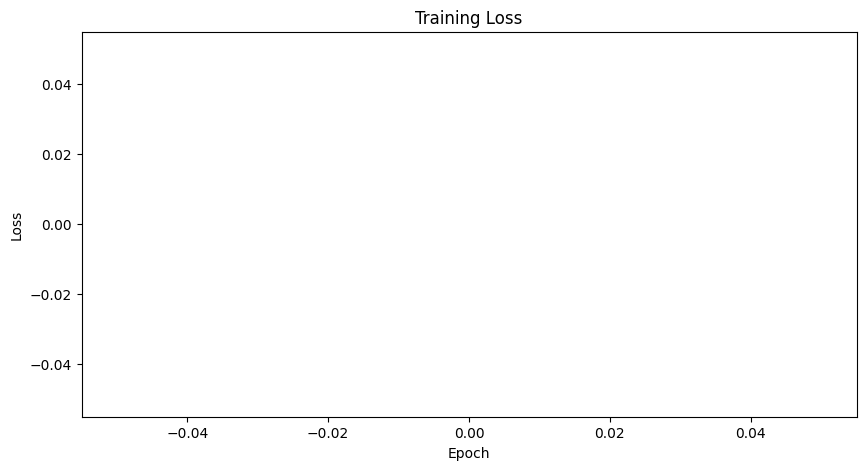

In [132]:
# ipython-input-126-aeac1763b5a2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib here

def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()  # Assuming load_mnist is defined elsewhere
    # Create model and optimizer
    model = EnergyNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history - Initialize history here
    history = []

    # Training loop starts here
    # ... (Rest of your training loop remains the same) ...

    return history  # Return the history list

# Call the train_ebm function and store the returned history
history = train_ebm()

# ... (Your plotting code) ...
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss_curve.png')
plt.show()

In [136]:
# ipython-input-126-aeac1763b5a2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib here

def train_ebm(epochs=120, batch_size=128):
    # Load data
    x_train, x_test = load_mnist()  # Assuming load_mnist is defined elsewhere
    # Create model and optimizer
    model = EnergyNetwork()  # Define model here to make it accessible
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Initialize sample buffer
    sample_buffer = list(np.random.uniform(0, 1, (10000, 28, 28, 1)))

    # Training history - Initialize history here
    history = []

    # Training loop starts here
    # ... (Rest of your training loop remains the same) ...

    return history, model  # Return both history and the trained model

# Call the train_ebm function and store the returned history and model
history, trained_model = train_ebm()  # Assign the trained model to 'trained_model'

# ... (Your plotting code) ...

# Generate final samples using the trained model
final_samples = tf.random.uniform((16, 28, 28, 1))
generated = langevin_dynamics(trained_model, final_samples) # Now 'trained_model' is defined

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


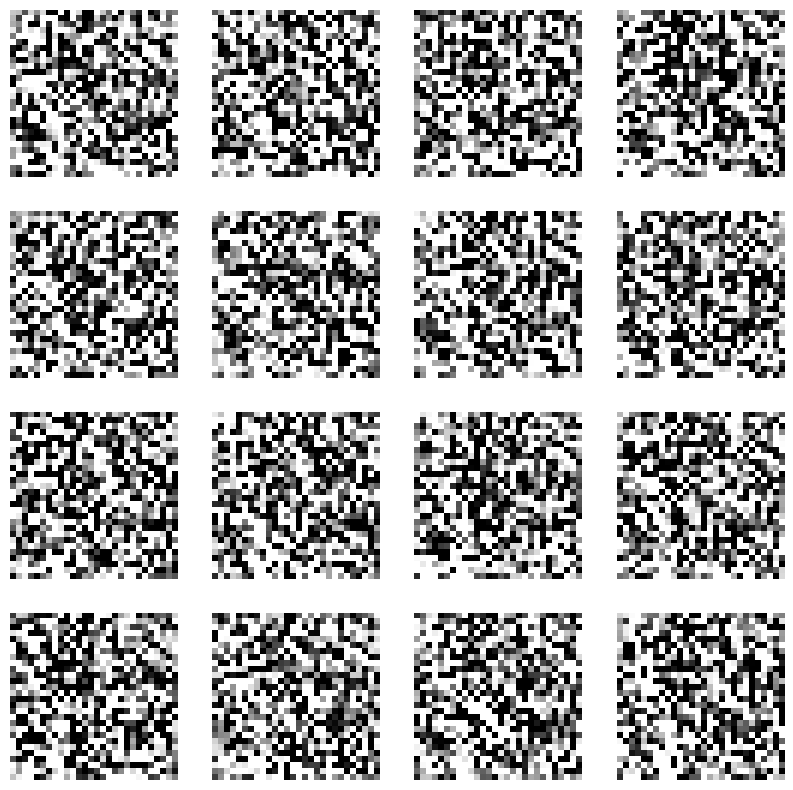

In [137]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.savefig('final_samples.png')
plt.show()